# Module 3: XML

In the digital world, data is often stored in XML documents. Understanding how they work, and being able to work with them is essential for a Data Engineer.

During this training we will go into detail about XML documents, and how to work with them in Python. During the training we will follow the following outline:
1. What is XML?
2. The ElementTree library 
3. Complex XML operations
4. Parsing XML documents

Enjoy!

Run the following cell to import all necessary libraries.

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

### Section 1: What is XML? (15 min)

XML stands for Extensible Markup Language, and it is very commonly used on webpages. XML creates a hierarchical, tree-like structure, and this structure helps it to be easily interpretable. There is a clear hierarchy in XML documents, as well as a useful flexibility. For those familiar to HTML, the XML document structure will feel very recognizable.

Let's have a look at an example. The image below is an example of a (very) limited XML document on energy consumption.

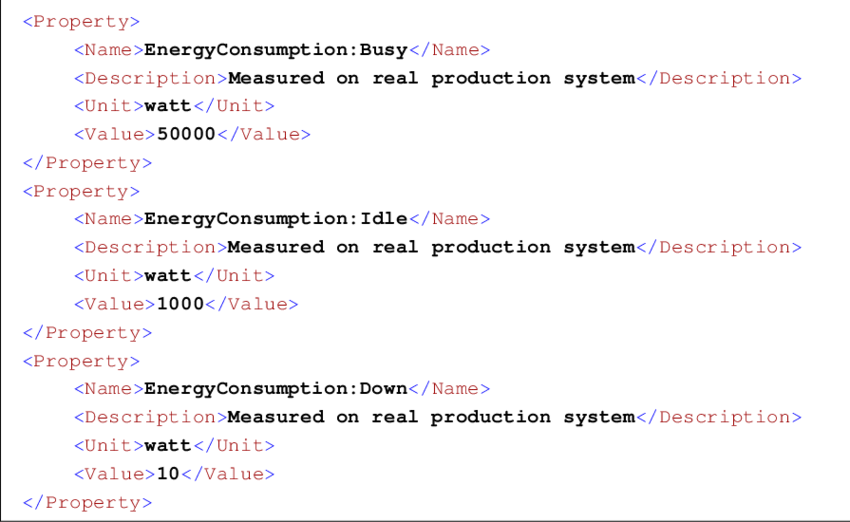

When look at the example above, a few things stand out. Let's address them one at a time.

First we'll have a look at tags. A tag is a markup construct that starts with a '<', and ends with a '>'. In the example above there are many tags, including '< Property >', '< Name >', and '< Value >'. As you may notice in the example, tags are always in pairs. There is a starting tag which indicates the start of a new tag, and there is a closing tag, which indicates the end. You can differentiate the two by the backslash within the second tag.

This is where it gets interesting. A pair of tags is called an element. And elements are the core of an XML document. The elements are used to partition the XML document into closed-off sections, and each element will contain information relevant to that element. The characters between a starting tag and a closing tag, if present, are the elements content. When we look at the image above, we can see some elements. Examples are below. 
- < Name > EnergyConsumption:Busy </ Name>
- < Unit > watt </ Unit >
- < Value > 50000 </ Value >

These are all separate elements, but for those that are observant, we can see something very interesting. They are actually part of another element. Within XML, elements can contain content, including other 'child elements'. So when we have a look at the first actual element of the example, we see the following.

< Property >
- < Name > EnergyConsumption:Busy </ Name>
- < Description > Measured on real production system </ Description > 
- < Unit > watt </ Unit >
- < Value > 50000 </ Value >

</ Property>

The Property element, is enclosed between two tags, and contains four more children elements (Name, Description, Unit, Value), each with their own information. This nested structure creates the hierarchical structure mentioned before.

Each XML document is made up of many elements and their children. The highest, top-level element is called the root. And this is where every XML journey begins.

Let's have a quick look at another example.

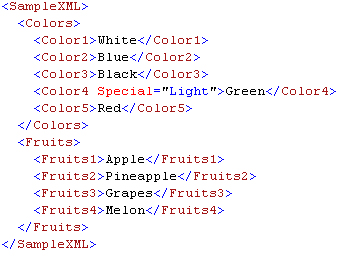

When comparing this to the first XML document example, we can see two important differences.

We can see that the element names are different. This is where the flexibility in XML document comes from. There is no predefined structure of names that XML documents have to follow.

Another interesting aspect is the red text within in the Color4 element. There is a key-value pair that seems to add information to the element. These are what we call attributes. They can add extra information to elements. Important to note is that attributes within XML can only have one value, and each attribute can appear only once on each element.

Now that we covered the basics of a XML document structure, let's move on to working with them in Python.

### Section 2: The ElementTree library  (30 min)

Like with everything in the world of Python, there is also a library for working with XML documents, and it's called ElementTree. With this library we can read, navigate, and manipulate XMLs.

When working with Python, it is paramount that you're able to read the documentation of libraries. So please have a close look at the documentation of ElementTree: https://docs.python.org/3/library/xml.etree.elementtree.html. Good documentation websites always include a good overview of the possibilities, and often a quickstart. In this case there even is a small tutorial.

Please have a good look! You'll need information from the documentation for the next couple of steps.

Let's make our first foray into the world of ElementTree, and we'll do it a bit different this time. There is an XML document called 'movies.xml' within this directory. You'll load this file, and get the root. And then we'll parse it.

#### Assignment 1: The ElementTree library 1

First import the ElementTree library (the usual way is to import the library 'as ET').
Then load the XML document 'movies.xml' into a variable called 'tree'.
After that, get the root of the 'tree' variable.

Lastly, print the document using the already existing statement.

In [ ]:
### FILL IN

Great, now you have the root of the XML document, and you have seen the structure of the XML document. And now we can start playing around with that document. Let's first just have a look at the root element. Using the '.tag' and the '.attrib' methods you can access the tag name and the attributes within the element.

#### Assignment 2: The ElementTree library 2

Print the tag name of the root element, and print the attributes of the root element (should be an empty dictionary).

In [ ]:
### FILL IN

Now we're going to have a look at the (grand)children of the root. Using a for loop you can access the children of an element. 

#### Assignment 3: The ElementTree library 3

Write a for loop that prints the tag names of the children of the root element. 

In [ ]:
### FILL IN

#### Assignment 4: The ElementTree library 4

Write a double for loop that prints the tag names of the grandchildren of the root element. Also print the '.text. element of the grandchildren. 

In [ ]:
### FILL IN

Using for loops you can access each level of the XML document. But the list all element tags, you'll have to know the exact structure and depth of the XML document, and that can be a bit problematic. Some XML documents are huge and complex, but luckily there is another way to access all elements. We can do it using the '.iter()' method.

#### Assignment 5: The ElementTree library 5

Use the '.iter()' method to print all element tag names, and all element tag attributes.

In [ ]:
### FILL IN

Sometimes we zoom in on specific elements, and we can still use the '.iter()' method for this. We only have to specify which element we are interested in. So if we're interested in the children of the 'movie' element, we can use '.iter('movie')' to find them. Let's have some more looks at the XML document.

#### Assignment 6: The ElementTree library 6

Loop over all children and grandchildren of the root element using a double for loop, and only print the actor tags.

In [ ]:
### FILL IN

#### Assignment 7: The ElementTree library 7

Loop over all elements, and print the texts of each element.

In [ ]:
### FILL IN

#### Assignment 8: The ElementTree library 8

Create a dictionary, with a key for each movie, and as a value a list with all the actor names.

In [ ]:
### FILL IN

### Section 3: Complex XML operations (25 min)

In this section we are going tot have a look at other operations in the ElementTree library that we can use to parse XML documents and their structure. XML documents can be very large, so it's important that you know how to search them.

In the sections before we searched the XML documents using for loops and used the element names as a basis. There are also other options to help you navigate the XML structure. Some of these options are the '.find' and the '.findall' methods. These can be used to either find the first matching element, or find all matching elements (in the form of a list).

These functionalities can be combined with the use of Xpath. Xpath is an expression language used to query XML documents (as well as HTML), and can be used to quickly search through an XML document. Xpath, as the name suggests, uses a 'path like' syntax. Below there is an example of the use of Xpath and the '.find' method.

```python
import xml.etree.ElementTree as ET

tree = ET.parse('movies.xml')
root = tree.getroot()

element_1 = root.find('./movie/actor/first_name')
print(element_1.text)

element_2 = root.find('./movie/actor/last_name')
print(element_2.text)
```

As you can see in the example, the '.find' method starts looking at the element provided. And then using a forward slash we can indicate that we are moving one element down. The element names than indicate what you're looking for.

And now it's time that you put it into practice.

#### Assignment 9: Complex XML operations 1

Retrieve all summaries from 'movies.xml' document, and print them. 
There should be six summaries in total.

In [ ]:
### FILL IN

#### Assignment 10: Complex XML operations 2

In the 'movies.xml' document, find all contents of the children elements of the actor elements. 
And put them in separate lists.
So in the end there should be four lists in total; a list containing the first_name, a list containing the last_name, a list containing the role, and a list containing the birth_date.

In [ ]:
### FILL IN

#### Assignment 11: Complex XML operations 3

Extract information from the 'movies.xml' document, and place it in a Pandas DataFrame.
Each row should contain the following information about a movie: title, year, genre, and the number of actors.

In [ ]:
### FILL IN

### Section 4: Parsing XML files (35 min)

Now we have seen the possibilities of the ElementTree library in combination with the structure of XML documents. Let's focus some more on retrieving information from XML documents.

Let's first focus on a new XML document; 'XML Country List.xml'.
A quick tip, if you want want to print an entire XML, use the following code (you have used this in an earlier assignment).  

```python
print(ET.tostring(root, encoding='utf8').decode('utf8'))
```

#### Assignment 12: Parsing XML files 1

Load the 'XML Country List.xml' and get the root.
Then print the entire XML document.

In [ ]:
### FILL IN

#### Assignment 13: Parsing XML files 2

Print out all element tag names.

In [ ]:
### FILL IN

#### Assignment 14: Parsing XML files 3

Fill a list with all country names. Use the '.text' method to retrieve the country name.

In [ ]:
### FILL IN

#### Assignment 15: Parsing XML files 4

Each country element has several attributes.
Create a Pandas DataFrame with per row a country with information found within the attributes.
The following attributes can be found: code, handle, continent, and iso.

In [ ]:
### FILL IN

Let's move on to another XML file, the 'books.xml'.

#### Assignment 16: Parsing XML files 5

Load the 'books.xml' document, and get the root.
Create a dictionary, with as keys the book names.
The values of the dictionary will be another dictionary, containing the information per book.

In [ ]:
### FILL IN